<a href="https://colab.research.google.com/github/FERIT-diplomski/LV2_2025_2026/blob/main/LV1_Vizualizacija_optimizacijskih_funkcija_metoda_izravne_pretrage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LV1 - VIZUALIZACIJA FUNKCIJA I NJIHOVIH LOKALNIH I GLOBALNIH MINIMUMA, I METODA IZRAVNE PRETRAGE


Minimum funkcije može se locirati na dva načina, ovisno o tome koristite li graf ili algoritam:

*Vizualno na grafu funkcije*

•	Na grafu funkcije f(x) minimum se nalazi kao najniža točka (dolina).
•	Pažljivo pogledati gdje funkcija ima najmanju vrijednost
•	Kod numeričkih funkcija s više minimuma (oscilacije) minimum može biti lokalni ili globalni — globalni je najniža vrijednost na cijelom grafu.
•	U Pythonu se može označiti markerom, npr. s plt.scatter().

*Algoritamski – numeričko traženje minimuma*

•	Provoditi grid search — izračunati vrijednost funkcije u nizu točaka u nekom intervalu, te odrediti onu točku (ili više njih) gdje je vrijednost funkcije najmanja.

•	Koristi optimizacijske algoritme (npr. Hooke-Jeeves, Golden Section Search ili funkcije poput scipy.optimize.minimize u Pythonu) za automatsko traženje minimuma.

•	Algoritam će vratiti vrijednost x gdje je vrijednost funkcije najmanja, koja se može označiti na grafu.

**Praktični koraci:**

1.	Grafički prikazati funkciju na željenom intervalu
2.	Vizualno identificirati najnižu točku.
3.	Pomoću numeričkih metoda (grid search, optimizacijski algoritam) izračunati točnu vrijednost x (ili (x, y) za 2D) gdje se nalazi minimum.
4.	Označiti tu točku na grafu. Može se koristiti plt.scatter ili sličan alat.


# **TASK1: Vizualizacija minimuma dane 2D funkcije**

* Nacrtajte njegovu 3D površinu i 2D konturnu kartu.
* Vizualno odredite lokaciju minimuma.


**Sljedeći kod je primjer Grid-search i vizualizacije:**

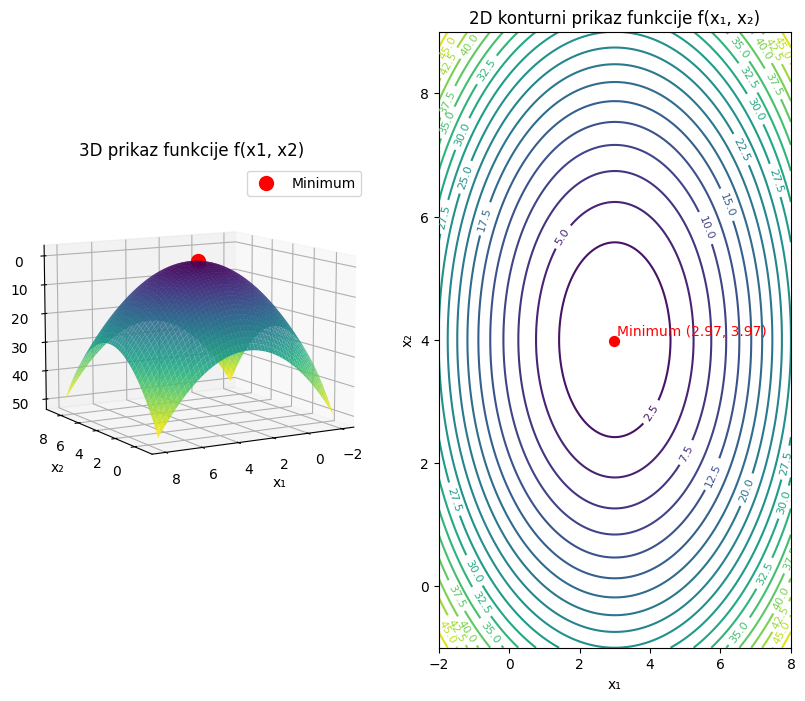

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definicija funkcije
def f(x1, x2):
    return (x1 - 3)**2 + (x2 - 4)**2

# Definicija raspona za x1 i x2
x1 = np.linspace(-2, 8, 200)
x2 = np.linspace(-1, 9, 200)

# Generiranje mreže točaka (meshgrid)
X1, X2 = np.meshgrid(x1, x2)

# Izračun vrijednosti funkcije za sve točke na mreži
# GRID SEARCH: evaluacija funkcije na svakoj točki mreže
# i traženje globalnog minimuma u diskretnom prostoru
Z = f(X1, X2)
idx = np.argmin(Z)

# Pronalaženje globalnog minimuma

x_min, y_min = X1.flat[idx], X2.flat[idx]
z_min = Z.flat[idx]

# --- 3D površinski prikaz ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.9)
ax.set_title("3D prikaz funkcije f(x1, x2)")
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("f(x₁, x₂)")

# Oznaka minimuma
ax.scatter(x_min, y_min, z_min, color='red', s=100, label='Minimum')
ax.legend()
ax.view_init(190, 120)


# --- 2D konturni prikaz ---
ax2 = fig.add_subplot(122)
cont = ax2.contour(X1, X2, Z, levels=20, cmap='viridis')
ax2.clabel(cont, inline=True, fontsize=8)
ax2.set_title("2D konturni prikaz funkcije f(x₁, x₂)")
ax2.set_xlabel("x₁")
ax2.set_ylabel("x₂")

# Označi minimum na konturi
ax2.scatter(x_min, y_min, color='red', s=50)
ax2.text(x_min + 0.1, y_min + 0.1, f"Minimum ({x_min:.2f}, {y_min:.2f})", color='red')


#plt.tight_layout()
plt.show()


In [ ]:
x_min, y_min

(np.float64(2.974874371859297), np.float64(3.974874371859297))

# Task2: **Grid Search**

In [ ]:
import numpy as np

	# Definicija funkcije f(x1, x2)
	# U ovom slucaju rijec je o paraboli s minimumom u tocki (3, 4)
def f(x1, x2):
	  return (x1 - 3)**2 + (x2 - 4)**2

	# 1. Definiranje intervala za pretrazivanje
	# np.linspace stvara 100 tocaka jednako rasporedenih u zadanom rasponu
x1_values = np.linspace(-2, 8, 100)
x2_values = np.linspace(-1, 9, 100)

	# 2. Formiranje mreze svih kombinacija x1 i x2 vrijednosti
	# np.meshgrid stvara 2D mrezu tocaka
X1, X2 = np.meshgrid(x1_values, x2_values)

	# 3. Izracunavanje vrijednosti funkcije na svakoj tocki mreze
Z = f(X1, X2)

	# 4. Pronalazak tocke s najmanjom vrijednoscu funkcije (globalni minimum)
min_idx = np.argmin(Z)              # vraca indeks najmanje vrijednosti
x_min, y_min = X1.flat[min_idx], X2.flat[min_idx]  # koordinate minimuma
z_min = Z.flat[min_idx]             # vrijednost funkcije u toj tocki

	# 5. Ispis rezultata
print(f"Minimum pronaden na: x1={x_min}, x2={y_min}, vrijednost={z_min}")


Minimum pronaden na: x1=2.94949494949495, x2=3.94949494949495, vrijednost=0.005101520253035336


# TASK 3: Heek - Jeeves metoda - pattern search method

- metoda uzorka pretraživanja (pattern search method) ili metoda direktnog pretraživanja (direct search method).
- Ova metoda koristi pristup pretraživanja bez derivacija, i često se naziva
metodom pokušaja i pogreške (trial and error method), jer pretražuje prostor mogućih rješenja kroz niz pokušaja u različitim smjerovima.


Hooke-Jeeves metoda, poznata i kao metoda uzorka i istraživanja, jedna je od metoda direktnog pretraživanja koja se koristi za rješavanje problema optimizacije u slučajevima kad derivacije funkcije cilja nisu dostupne ili nisu pouzdane. To znači da Hooke-Jeeves metoda može pronalaziti optimalna rješenja i za funkcije koje nisu glatke ili su diskontinuirane.

Metoda se temelji na dva glavna koraka:

1. Istraživački korak (*Exploratory Move*): U ovom koraku algoritam ispituje susjedne točke trenutnog rješenja, pokušavajući pronaći točku koja smanjuje vrijednost funkcije cilja.
2. Korak uzorka (*Pattern Move*): Ako istraživački korak pronađe bolju točku, algoritam se kreće dalje u tom smjeru kako bi brže pronašao optimalno rješenje.

Ovaj ciklus se ponavlja sve dok se ne postigne unaprijed određeni uvjet zaustavljanja, koji može biti vrlo mali korak ili ograničenje broja iteracija.

Primjena Hooke-Jeeves metode pogodna je za:

- Probleme u kojima nije poznata derivacija funkcije cilja,
- Probleme s nesigurnim ili diskontinuiranim funkcijama cilja,
- Optimizaciju kod koje je potrebno ispitati više lokalnih minimuma kako bi se približili globalnom optimumu.

Cilj ove vježbe je implementirati algoritam Hooke-Jeeves metode na stvarnim problemima optimizacije te razumjeti kako algoritam istražuje prostor rješenja i pronalazi optimalne točke.

Sljedeći kod je osnovni algoritam za hooke_jeeves

In [ ]:
import numpy as np

def hooke_jeeves(f, X0, dx, epsilon, gamma=1.0, max_iter=1000):
    n = len(X0)                            # Dimenzija problema (broj varijabli)
    XC = X0.astype(float).copy()          # Trenutna (osnovna) točka u prostoru rješenja
    FC = f(XC)                           # Vrijednost funkcije u trenutnoj točki
    XB = XC.copy()                      # Najbolja pronađena točka
    FB = FC                            # Vrijednost funkcije u najboljoj točki
    iters = 0                          # Broj evaluacija funkcije

    # Glavna petlja traje dok je barem jedna komponenta koraka veća od epsilon
    # i dok nismo prešli maksimalan broj iteracija (evaluacija)
    while np.any(dx > epsilon) and iters < max_iter:
        X_prev = XC.copy()              # Spremamo prethodnu točku prije exploratory search
        improved = False               # Flag koji označava je li bilo poboljšanja u ovom krugu

        # Exploratory Search: za svaku dimenziju testiramo pomake u oba smjera prije ažuriranja
        for i in range(n):
            best_local_F = FC          # Lokalno najbolja vrijednost u ovoj dimenziji
            best_local_X = XC.copy()  # Lokalno najbolja točka u ovoj dimenziji

            # Provjeri pomak u pozitivnom smjeru dimenzije i
            for s in [+1, -1]:
                XT = XC.copy()
                XT[i] += s * dx[i]     # Pomak u smjeru i-te dimenzije, pozitivno ili negativno
                FT = f(XT)             # Evaluiraj funkciju u toj točki
                iters += 1             # Povećaj broj evaluacija

                # Ako je pronađeno bolje rješenje, spremi ga lokalno
                if FT < best_local_F:
                    best_local_F = FT
                    best_local_X = XT.copy()

            # Nakon što testiramo oba smjera, prihvati najbolju točku ako je bolja od trenutne
            if best_local_F < FC:
                XC, FC = best_local_X, best_local_F
                improved = True          # Označi da je bilo poboljšanja

        # Sinkroniziraj globalno najbolje rješenje ako ga ima
        if FC < FB:
            XB, FB = XC.copy(), FC

        # Pattern Move: pomicanje u smjeru zadnjeg poboljšanja radi brže konvergencije
        if improved:
            XP = XC + gamma * (XC - X_prev)  # Izračunaj novu točku pomakom u smjeru poboljšanja
            FP = f(XP)                       # Evaluiraj funkciju
            iters += 1

            # Ako je pattern move donio poboljšanje, prihvati tu točku
            if FP < FC:
                XC, FC = XP, FP
                if FC < FB:                  # Ažuriraj globalno najbolje ako treba
                    XB, FB = XC.copy(), FC
            # Ako nije bolja, ostani na trenutnoj točki (nema promjene)
        else:
            # Nije bilo poboljšanja - smanjuj korake za finije pretraživanje
            dx = dx / 2.0

    # Vraća najbolju pronađenu točku i odgovarajuću vrijednost funkcije
    return XB, FB


# Primjer poziva:
def f(x):
    return (x[0] - 3)**2 + (x[1] - 4)**2 + (x[2] +2)**2

X0 = np.array([0.0, 0.0, 0.0])            # početna točka
dx = np.array([1.0, 1.0, 1.0])            # početni korak po dimenzijama
epsilon = 1e-6                       # preciznost
gamma = 0.5                          # faktor akceleracije
max_iter = 5000

xmin, fmin = hooke_jeeves(f, X0, dx, epsilon, gamma, max_iter)
print('Minimum na:', xmin)
print('Vrijednost u minimumu:', fmin)


Minimum na: [ 3.  4. -2.]
Vrijednost u minimumu: 0.0


**Donji primjeri su za vježbu i isprobavanje**

In [ ]:
############## Primjer 1
def f(x):
    return x[0]**2 + x[1]**2
x_start = np.array([1.0, 1.0])
alpha = 0.5
epsilon = 1e-5

optimal_x = hooke_jeeves() #upisati što nedostaje u argumentu funkcije i što još nedostaje da bi se primjer ispitao! Ispisati optimal_x i steps!
print("Optimalno rješenje:", optimal_x)


Optimalno rješenje: [0. 0.]


In [ ]:
####### Primjer 2

def f(x):
    return (x[0] - 11)**2 + (x[1] - x[0]**2)**2 + (x[0] + x[1] - 7)**2

x_start = np.array([0.0, 0.0])
alpha = 0.5
epsilon = 0.25

optimal_x = hooke_jeeves() #upisati što nedostaje u argumentu funkcije i što još nedostaje da bi se primjer ispitao! Ispisati optimal_x i steps!
print("Optimalno rješenje:", optimal_x)


In [ ]:
############## Primjer 3

f = lambda x: x[0]**2 + x[1]**2
x_start = np.array([1.0, 1.0])
alpha = 0.5
epsilon = 1e-5

optimal_x, steps = hooke_jeeves()   #upisati što nedostaje u argumentu funkcije i što još nedostaje da bi se primjer ispitao! Ispisati optimal_x i steps!


In [ ]:
def f(x):

   return 2 * x[1]**2 - 2.25 * x[0] * x[1] - 1.75 * x[1] + 1.5 * x[0]**2+ (x[2]+7)**2

In [ ]:
x_start = np.array(###########)
alpha = 0.5
epsilon = 1e-10

optimal_x = hooke_jeeves()  #upisati što nedostaje u argumentu funkcije i što još nedostaje da bi se primjer ispitao!
print("Optimalno rješenje:", optimal_x)

**GRAF**

TASK 4 **Nelder - Mead metoda**

Nelder-Mead metoda se koristi za optimizaciju funkcija koje nisu glatke ili za koje nije moguće lako izračunati derivacije.
1. Bez potrebe za derivacijama

  Nelder-Mead je "*derivative-free*" metoda, što znači da se može koristiti za funkcije kod kojih:
  Derivacije nisu definirane ili ih je teško izračunati
  Funkcija ima diskontinuitete ili oštre promjene, što onemogućava primjenu gradijentnih metoda.

2. Primjenjiva na nelinearne i nesvodive funkcije

  Metoda se često koristi za nelinearne funkcije koje mogu imati više minimuma ili složen oblik. Funkcija ne mora biti glatka ili kontinuirana, a to je vrlo važno kada radimo s problemima iz "stvarnog svijeta", poput simulacija ili eksperimentalnih podataka.

3. Višedimenzionalna optimizacija

  Nelder-Mead metoda može raditi s funkcijama s više varijabli (višedimenzionalnim funkcijama). Koristi se za traženje minimuma funkcija više varijabli konstruiranjem i prilagođavanjem simpleksa (geometrijski oblik s n+1 točaka u n dimenzija).
  Na primjer, u dvodimenzionalnom prostoru (dvije varijable), simpleks je trokut, dok je u trodimenzionalnom prostoru simpleks tetraedar.

4. Postupak koristi heuristiku

   Nelder-Mead koristi kombinaciju različitih postupaka (npr. refleksije, ekspanzije, kontrakcije, i smanjenja simpleksa) kako bi prilagodio simpleks tijekom iteracija.
   
   To omogućuje postupku da:
    

*   Brzo pretražuje područja s mogućim boljim rješenjem pomoću refleksije i ekspanzije
*   Smanjuje veličinu pretraživanog prostora kada se čini da nema značajnih poboljšanja.

5. Jednostavna implementacija

  Metoda je relativno jednostavna za implementaciju i nema puno parametara koje treba podešavati, što je čini atraktivnom za rješavanje problema kada je potrebno brzo dobiti rješenje bez puno postavki.
  Algoritam se može lako integrirati u različite programske jezike i biblioteke, a mnoge optimizacijske biblioteke (poput scipy.optimize) već sadrže implementaciju Nelder-Mead metode.

6. Efikasna u Malom Broju Dimenzija

   Nelder-Mead metoda je posebno pogodna za probleme s malim brojem dimenzija (do 10 varijabli). Kako broj dimenzija raste, metoda može postati manje efikasna, no za male i srednje probleme je vrlo učinkovita.

7. Rad na teško prilagodljivim problema

  U "stvarnim problemima", poput podešavanja hiperparametara u strojnim modelima ili optimizacije funkcija temeljenih na eksperimentalnim podacima, funkcija cilja može biti:
  
*   Nesvodiva ili previše "gruba" za gradijentne metode.
*   Nelder-Mead može pronaći minimum čak i kada druge metode zbog problematične strukture funkcije ne mogu.


Primjeri upotrebe Nelder-Mead metode



*   Strojno Učenje: Podešavanje hiperparametara modela kada funkcija cilja nema lijepu analitičku formu ili kada se radi o eksperimentalnim mjerenjima.
*   Eksperimentalna Optimizacija: Kad imamo funkciju definiranu samo pomoću eksperimentalnih mjerenja, gdje ne postoji eksplicitna analitička funkcija ili derivacija.
*  Simulacije: Optimizacija simulacijskih modela, gdje funkcija cilja može biti rezultat simulacije, a derivacije nisu dostupne.


Slabosti Nelder-Mead Metode



*   Sporost Konvergencije: Metoda može biti spora i neefikasna blizu optimuma jer se oslanja na heuristiku bez korištenja gradijentnih informacija.
*   Lokalni Minimum: Može završiti u lokalnom minimumu i nije prikladna za globalnu optimizaciju kada postoji mnogo lokalnih minimuma.
* Dimenzionalnost: Efikasnost opada s povećanjem broja dimenzija problema jer se jednostavno skaliranje simpleksa s višim dimenzijama postaje složenije.


Zaključak

Nelder-Mead metoda se koristi zato što je jednostavna, intuitivna, i ne zahtijeva izračun derivacija, što je čini vrlo korisnom za određene probleme optimizacije. Idealna je za optimizaciju složenih funkcija koje imaju teško definirane derivacije ili koje su nesvodive. Međutim, zbog svoje ovisnosti o lokalnim informacijama i heurističkog pristupa, može biti spora i nije uvijek najbolji izbor za vrlo visoke dimenzije ili za pronalaženje globalnog minimuma.

https://www.youtube.com/watch?v=j2gcuRVbwR0

In [ ]:
import numpy as np

def nelder_mead(f, x0, alpha=1, gamma=2, beta=0.5, delta=0.5, epsilon=1e-6, max_iter=100):
    n = len(x0)
    X = [x0]

    # Generiraj početni simpleks
    for i in range(n):
        x = np.copy(x0)
        x[i] = x[i] + delta
        X.append(x)
    X = np.array(X)

    iter = 0
    while iter < max_iter:
        # Rangiraj točke prema funkciji
        f_values = [f(x) for x in X]
        l = np.argmin(f_values)
        h = np.argmax(f_values)

        # Središnja točka simpleksa osim najgore
        xc = np.mean([X[i] for i in range(len(X)) if i != h], axis=0)

        # Refleksija
        xr = xc + alpha * (xc - X[h])
        fr = f(xr)
        best_val = f_values[l]

        if best_val <= fr < f_values[h]:
            X[h] = xr
        elif fr < best_val:
            # Ekspanzija
            xe = xc + gamma * (xr - xc)
            fe = f(xe)
            if fe < fr:
                X[h] = xe
            else:
                X[h] = xr
        else:
            # Kontrakcija
            if fr < f_values[h]:
                # Vanjska kontrakcija
                xk = xc + beta * (xr - xc)
                fk = f(xk)
                if fk < fr:
                    X[h] = xk
                else:
                    # Sažimanje
                    for i in range(len(X)):
                        if i != l:
                            X[i] = X[l] + delta * (X[i] - X[l])
            else:
                # Unutarnja kontrakcija
                xk = xc + beta * (X[h] - xc)
                fk = f(xk)
                if fk < f_values[h]:
                    X[h] = xk
                else:
                    for i in range(len(X)):
                        if i != l:
                            X[i] = X[l] + delta * (X[i] - X[l])
        # Kriterij zaustavljanja (jednostavan primjer)
        if np.max([np.linalg.norm(X[i] - X[l]) for i in range(len(X))]) < epsilon:
            break
        iter += 1

    return X[l], f(X[l])


In [ ]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def func(x):
    x = x**2+2*np.sin(x*np.pi)
    return x

In [ ]:
import numpy as np

def func(x):
    return x**2 + 2*np.sin(x*np.pi)

x0 = np.array([0.0])  # Početna točka, npr. skalar ili vektor

minimum, min_value = nelder_mead(func, x0)

print("Minimum x:", minimum)
print("Vrijednost u minimumu:", min_value)


Minimum x: [-0.45385361]
Vrijednost u minimumu: [-1.77303647]


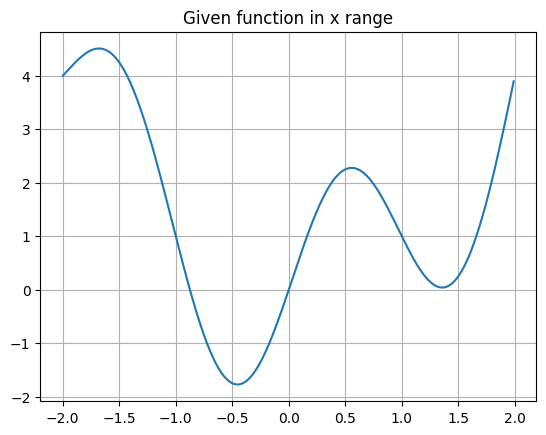

In [ ]:
def func(x):
    x = x**2+2*np.sin(x*np.pi)
    return x



x = np.arange(-2, 2, 0.01)
y = func(x)

plt.title("Given function in x range")
plt.plot(x, y)
plt.grid()
plt.show()



In [ ]:
x0=0

In [ ]:
result=minimize(func,x0,method="Nelder-Mead") ############# ne koristiti ugrađene funkcije, ovo je samo za primjer i za uspordbu rješenja!
print(result)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -1.7730364631740099
             x: [-4.539e-01]
           nit: 23
          nfev: 46
 final_simplex: (array([[-4.539e-01],
                       [-4.538e-01]]), array([-1.773e+00, -1.773e+00]))


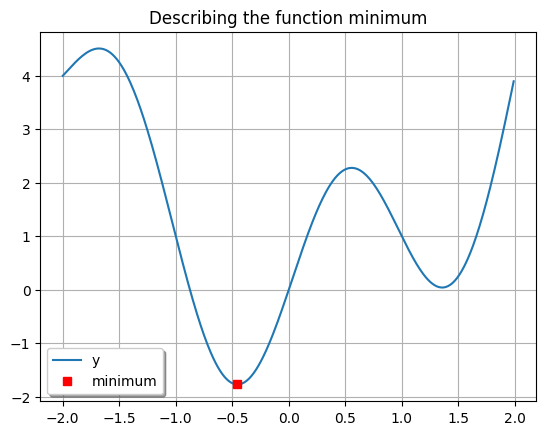

In [ ]:
plt.title("Describing the function minimum")
plt.plot(x, y, label="y")
plt.plot(result['x'], result['fun'], 'sr', label="minimum")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show()